In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
veriler = pd.read_csv("k_means.csv")

In [42]:
veriler

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [43]:
X = veriler.iloc[:,3:].values

# ***kmeans (k- ortalama) algoritması***

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters= 4 , init="k-means++")

In [46]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
kmeans.cluster_centers_

array([[ 16245.76271186,   5363.13559322],
       [ 81588.46153846,   6765.38461538],
       [ 44640.57971014,   5255.79710145],
       [122140.        ,   8000.        ]])

In [48]:
sonuclar=[]

In [49]:
for i in range(1,11):
  kmeans = KMeans(n_clusters= i , init="k-means++", random_state= 123)
  kmeans.fit(X)
  sonuclar.append(kmeans.inertia_)

In [50]:
sonuclar

[242389902746.875,
 69083288306.74913,
 37348094671.27113,
 19660743423.02979,
 12911353632.710127,
 8631933632.93952,
 6681057888.771544,
 5270111379.568713,
 4247077193.831545,
 3278831773.1846194]

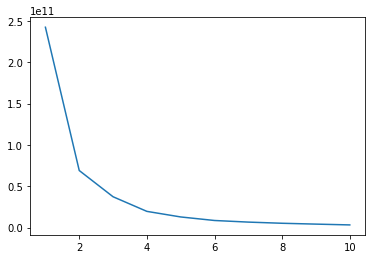

In [51]:
plt.plot(range(1,11), sonuclar)

In [52]:
kmeans = KMeans(n_clusters= 4 , init="k-means++", random_state= 123)
Y_tahmin =kmeans.fit_predict(X)

Text(0.5, 1.0, 'KMeans')

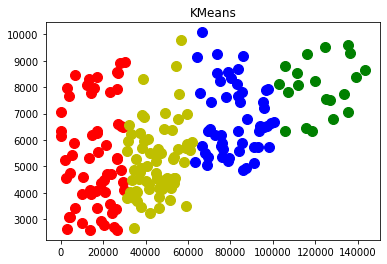

In [53]:
plt.scatter(X[Y_tahmin == 0,0] , X[Y_tahmin ==0 ,1] , s=100 , c="r")
plt.scatter(X[Y_tahmin == 1,0] , X[Y_tahmin ==1 ,1] , s=100 , c="b")
plt.scatter(X[Y_tahmin == 2,0] , X[Y_tahmin ==2 ,1] , s=100 , c="g")
plt.scatter(X[Y_tahmin == 3,0] , X[Y_tahmin ==3 ,1] , s=100 , c="y")
plt.title("KMeans")

# ***hiyerarşik bölütleme (clustering)***

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
ac = AgglomerativeClustering(n_clusters= 4 , affinity="euclidean" , linkage= "ward")

In [56]:
Y_tahmin = ac.fit_predict(X)
Y_tahmin

array([0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 3, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 3, 2, 0, 3, 3, 0, 0, 2, 0, 1, 0, 3, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 3, 0, 1, 2, 2, 2, 1, 1, 3, 0, 0, 1,
       2, 2, 0, 2, 3, 1, 2, 1, 2, 0, 2, 2, 1, 3, 0, 2, 2, 0, 0, 1, 1, 3,
       3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 3, 1, 1, 0, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1,
       1, 1])

Text(0.5, 1.0, 'HC')

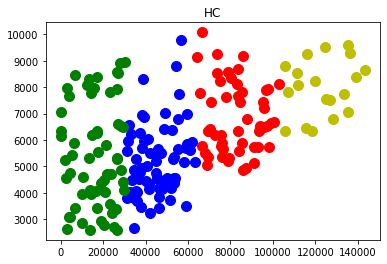

In [57]:
plt.scatter(X[Y_tahmin == 0,0] , X[Y_tahmin ==0 ,1] , s=100 , c="r")
plt.scatter(X[Y_tahmin == 1,0] , X[Y_tahmin ==1 ,1] , s=100 , c="b")
plt.scatter(X[Y_tahmin == 2,0] , X[Y_tahmin ==2 ,1] , s=100 , c="g")
plt.scatter(X[Y_tahmin == 3,0] , X[Y_tahmin ==3 ,1] , s=100 , c="y")
plt.title("HC")

In [58]:
import scipy.cluster.hierarchy as shc

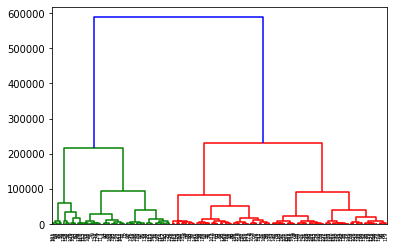

In [59]:
dendrogram = shc.dendrogram(shc.linkage(X , method= "ward"))